In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ipl = pd.read_csv('IPL_clean.csv')
ipl.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,winner,result,result_margin
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs,140.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,runs,33.0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,wickets,9.0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,wickets,5.0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,wickets,5.0


In [3]:
print(ipl.shape)
print(ipl.dtypes)
print(ipl.isnull().sum())
print(ipl['season'].unique())

(1095, 12)
id                  int64
season             object
city               object
date               object
match_type         object
player_of_match    object
venue              object
team1              object
team2              object
winner             object
result             object
result_margin      object
dtype: object
id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
winner             0
result             0
result_margin      0
dtype: int64
['2007/08' '2009' '2009/10' '2011' '2012' '2013' '2014' '2015' '2016'
 '2017' '2018' '2019' '2020/21' '2021' '2022' '2023' '2024']


Matches per season

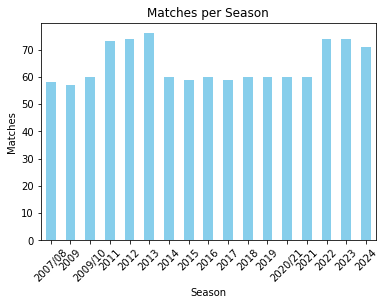

In [4]:
season_matches = ipl['season'].value_counts().sort_index()
season_matches.plot(kind='bar', title='Matches per Season', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.xticks(rotation=45)
plt.show()


Most successful teams

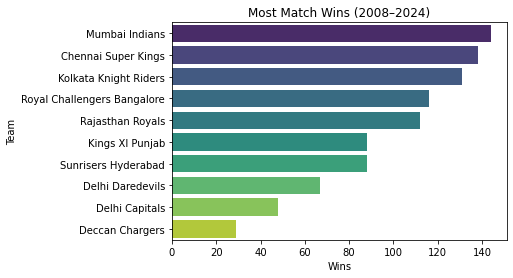

In [5]:
top_teams = ipl['winner'].value_counts().head(10)
sns.barplot(y=top_teams.index, x=top_teams.values, palette='viridis')
plt.title("Most Match Wins (2008–2024)")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()

Top Players of the match

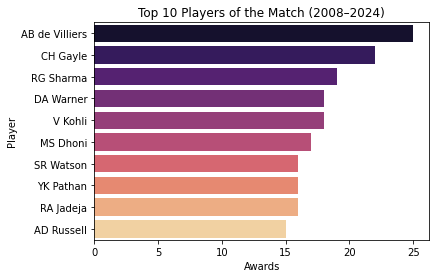

In [7]:
top_players = ipl['player_of_match'].value_counts().head(10)
sns.barplot(x=top_players.values, y=top_players.index, palette='magma')
plt.title('Top 10 Players of the Match (2008–2024)')
plt.xlabel('Awards')
plt.ylabel('Player')
plt.show()

Winning margins

In [16]:
ipl['win_by_runs'] = ipl.apply(lambda x: x['result_margin'] if x['result'] == 'runs' else 0, axis=1)
ipl['win_by_wickets'] = ipl.apply(lambda x: x['result_margin'] if x['result'] == 'wickets' else 0, axis=1)

In [17]:
ipl.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,winner,result,result_margin,win_by_runs,win_by_wickets
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs,140.0,140.0,0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,runs,33.0,33.0,0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,wickets,9.0,0,9.0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,wickets,5.0,0,5.0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,wickets,5.0,0,5.0


In [19]:
ipl['win_by_runs'] = pd.to_numeric(ipl['win_by_runs'], errors='coerce')
ipl['win_by_wickets'] = pd.to_numeric(ipl['win_by_wickets'], errors='coerce')

In [20]:
ipl[ipl['win_by_runs'] > 0]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,winner,result,result_margin,win_by_runs,win_by_wickets
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,runs,140.0,140.0,0.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,runs,33.0,33.0,0.0
7,335989,2007/08,Chennai,2008-04-23,League,ML Hayden,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Mumbai Indians,Chennai Super Kings,runs,6.0,6.0,0.0
9,335991,2007/08,Chandigarh,2008-04-25,League,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Mumbai Indians,Kings XI Punjab,runs,66.0,66.0,0.0
14,335996,2007/08,Bangalore,2008-04-28,League,MS Dhoni,M Chinnaswamy Stadium,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,runs,13.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1426300,2024,Bengaluru,2024-05-12,League,C Green,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bengaluru,Delhi Capitals,Royal Challengers Bengaluru,runs,47.0,47.0,0.0
1086,1426302,2024,Delhi,2024-05-14,League,I Sharma,"Arun Jaitley Stadium, Delhi",Delhi Capitals,Lucknow Super Giants,Delhi Capitals,runs,19.0,19.0,0.0
1088,1426305,2024,Mumbai,2024-05-17,League,N Pooran,"Wankhede Stadium, Mumbai",Lucknow Super Giants,Mumbai Indians,Lucknow Super Giants,runs,18.0,18.0,0.0
1089,1426306,2024,Bengaluru,2024-05-18,League,F du Plessis,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bengaluru,Chennai Super Kings,Royal Challengers Bengaluru,runs,27.0,27.0,0.0


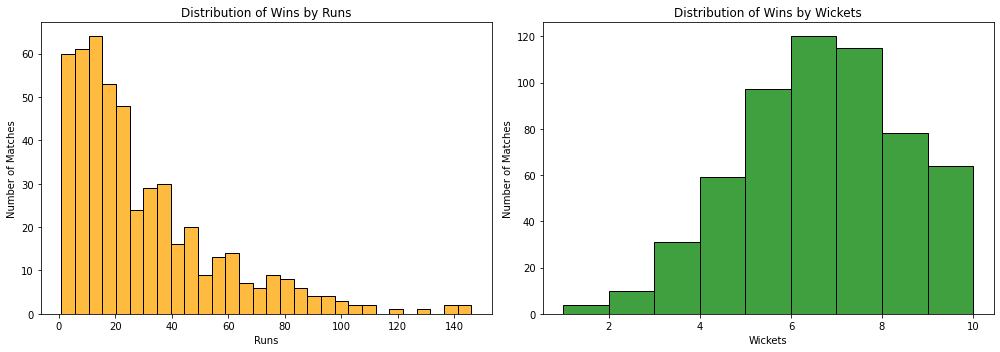

In [21]:

plt.figure(figsize=(14,5))

# Win by runs
plt.subplot(1,2,1)
sns.histplot(ipl[ipl['win_by_runs'] > 0]['win_by_runs'], bins=30, color='orange')
plt.title('Distribution of Wins by Runs')
plt.xlabel('Runs')
plt.ylabel('Number of Matches')

# Win by wickets
plt.subplot(1,2,2)
sns.histplot(ipl[ipl['win_by_wickets'] > 0]['win_by_wickets'], bins=9, color='green')
plt.title('Distribution of Wins by Wickets')
plt.xlabel('Wickets')
plt.ylabel('Number of Matches')

plt.tight_layout()
plt.show()

Most popular venue

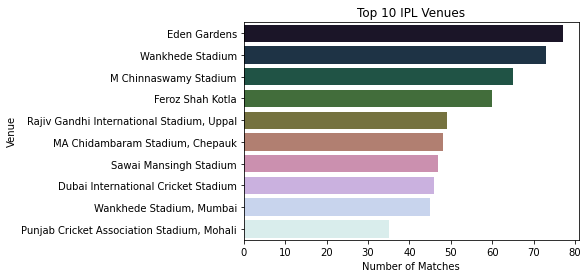

In [22]:
venue_count = ipl['venue'].value_counts().head(10)
sns.barplot(y=venue_count.index, x=venue_count.values, palette='cubehelix')
plt.title('Top 10 IPL Venues')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

Team vs Team Head to Head

In [23]:
team_battles = ipl.groupby(['team1', 'team2']).size().reset_index(name='matches')
team_battles = team_battles.sort_values(by='matches', ascending=False).head(10)
print(team_battles)

                           team1                  team2  matches
8            Chennai Super Kings         Mumbai Indians       22
184  Royal Challengers Bangalore         Mumbai Indians       19
182  Royal Challengers Bangalore  Kolkata Knight Riders       19
92         Kolkata Knight Riders         Mumbai Indians       18
174  Royal Challengers Bangalore    Chennai Super Kings       18
11           Chennai Super Kings       Rajasthan Royals       17
122               Mumbai Indians       Rajasthan Royals       17
95         Kolkata Knight Riders       Rajasthan Royals       16
118               Mumbai Indians  Kolkata Knight Riders       16
83         Kolkata Knight Riders    Chennai Super Kings       15
